In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
import os
import pandas as pd
import plotly.graph_objects as go
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import xticks
import seaborn as sns
import plotly.express as px



os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID";
os.environ["CUDA_VISIBLE_DEVICES"]="0" 


In [2]:
!pip3 install -q ktrain

     |████████████████████████████████| 25.3 MB 1.2 MB/s 
     |████████████████████████████████| 981 kB 62.1 MB/s 
     |████████████████████████████████| 263 kB 77.9 MB/s 
     |████████████████████████████████| 3.8 MB 49.1 MB/s 
     |████████████████████████████████| 1.3 MB 52.1 MB/s 
     |████████████████████████████████| 468 kB 49.5 MB/s 
     |████████████████████████████████| 7.6 MB 45.0 MB/s 
     |████████████████████████████████| 880 kB 70.6 MB/s 
     |████████████████████████████████| 182 kB 49.2 MB/s 


In [3]:
from ktrain.text.zsl import ZeroShotClassifier
zsl = ZeroShotClassifier()

Downloading:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.13k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/878k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/446k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.29M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.52G [00:00<?, ?B/s]

In [4]:
labels=['politics', 'elections', 'sports', 'films', 'television','crime','geography']
labels_pn=['negative','positive']

In [5]:
 def Sort_Tuple(tup):
 
    # reverse = None (Sorts in Ascending order)
    # key is set to sort using second element of
    # sublist lambda has been used
    x = sorted(tup,key = lambda x: x[1])
    result = dict(x)

    return result

In [6]:
doc = 'I am extremely dissatisfied with the President and will definitely vote in 2020.'
zsl.predict(doc, labels=labels, include_labels=True,multilabel=True)

[('politics', 0.9791898727416992),
 ('elections', 0.9874580502510071),
 ('sports', 0.0005765437381342053),
 ('films', 0.002292429096996784),
 ('television', 0.0010546129196882248),
 ('crime', 0.0445500984787941),
 ('geography', 0.006052970886230469)]

In [7]:
doc = """
President Donald Trump's senior adviser and son-in-law, Jared Kushner, praised 
the administration's response to the coronavirus pandemic as a \"great success story\" on Wednesday -- 
less than a day after the number of confirmed coronavirus cases in the United States topped 1 million. 
Kushner painted a rosy picture for \"Fox and Friends\" Wednesday morning, 
saying that \"the federal government rose to the challenge and 
this is a great success story and I think that that's really what needs to be told.\"
"""
l1=zsl.predict(doc, labels=labels, include_labels=True,multilabel=True)
l1

[('politics', 0.8049424886703491),
 ('elections', 0.018893307074904442),
 ('sports', 0.005504789296537638),
 ('films', 0.05876997113227844),
 ('television', 0.8776816725730896),
 ('crime', 0.15870243310928345),
 ('geography', 0.026368508115410805)]

In [8]:
doc = "I will definitely not be seeing this movie again."
zsl.predict(doc, labels=labels_pn, include_labels=True,multilabel=True)

[('negative', 0.9727605581283569), ('positive', 0.05536985769867897)]

In [9]:
doc = "I will definitely not be seeing this movie again, but the acting was good."
zsl.predict(doc, labels=labels_pn, include_labels=True,multilabel=True)

[('negative', 0.7756598591804504), ('positive', 0.6974377632141113)]

In [10]:
#doc = input()
#zsl.predict(doc, labels=['negative', 'positive'], include_labels=True,
#            nli_template="The sentiment of this movie review is {}.")

In [11]:
doc = """
President Donald Trump's senior adviser and son-in-law, Jared Kushner, praised 
the administration's response to the coronavirus pandemic as a \"great success story\" on Wednesday -- 
less than a day after the number of confirmed coronavirus cases in the United States topped 1 million. 
Kushner painted a rosy picture for \"Fox and Friends\" Wednesday morning, 
saying that \"the federal government rose to the challenge and 
this is a great success story and I think that that's really what needs to be told.\"
"""
l1=zsl.predict(doc, labels=labels, include_labels=True,multilabel=True)
test=Sort_Tuple(l1)
test


{'sports': 0.005504789296537638,
 'elections': 0.018893307074904442,
 'geography': 0.026368508115410805,
 'films': 0.05876997113227844,
 'crime': 0.15870243310928345,
 'politics': 0.8049424886703491,
 'television': 0.8776816725730896}

In [12]:
type(test)

dict

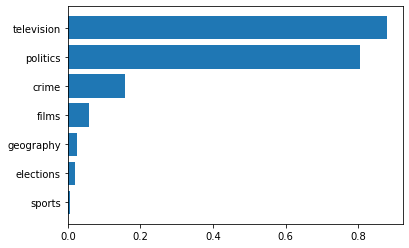

In [13]:
plt.barh(*zip(*test.items()))
plt.show()

In [14]:
!pip install -q streamlit


     |████████████████████████████████| 10.3 MB 12.6 MB/s 
     |████████████████████████████████| 237 kB 50.5 MB/s 
     |████████████████████████████████| 182 kB 60.5 MB/s 
     |████████████████████████████████| 164 kB 54.1 MB/s 
     |████████████████████████████████| 4.7 MB 53.4 MB/s 
     |████████████████████████████████| 78 kB 4.1 MB/s 
     |████████████████████████████████| 62 kB 1.2 MB/s 
     |████████████████████████████████| 51 kB 5.8 MB/s 


In [15]:
!mkdir -p .streamlit
!touch .streamlit/config.toml 
!echo  -e '[theme] \n primaryColor="#0095ff" \n backgroundColor="#000000" \n secondaryBackgroundColor="#232729" \n textColor="#0095ff" \n font="sans serif" \n' > .streamlit/config.toml

In [16]:
!cat .streamlit/config.toml

[theme] 
 primaryColor="#0095ff" 
 backgroundColor="#000000" 
 secondaryBackgroundColor="#232729" 
 textColor="#0095ff" 
 font="sans serif" 



In [17]:
%%writefile app.py
def Sort_Tuple(tup):
 
    # reverse = None (Sorts in Ascending order)
    # key is set to sort using second element of
    # sublist lambda has been used
    x = sorted(tup,key = lambda x: x[1])
    result = dict(x)

    return result

def Sort_Tuple_pn(tup):
 
    # reverse = None (Sorts in Ascending order)
    # key is set to sort using second element of
    # sublist lambda has been used
    #x = sorted(tup,key = lambda x: x[1])
    result1 = dict(tup)

    return result1


import os
import pandas as pd
import plotly.graph_objects as go
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import xticks
import seaborn as sns
import plotly.express as px
import streamlit as st
from ktrain.text.zsl import ZeroShotClassifier
labels=['politics', 'elections', 'sports', 'films', 'television','crime','geography']
labels_pn=['negative','positive']
zsl = ZeroShotClassifier()

st.sidebar.title("Select Task")
Options = st.sidebar.selectbox('Select the Task', 
                                    ('Text Classification', 'Sentiment Analysis'))

if Options == 'Text Classification':
    st.title("Text Classification")
    sample = 'sample'
    txt = st.text_area('Text to analyze',value=sample)
    if st.button('submit'):
        chart_data=Sort_Tuple(zsl.predict(txt, labels=labels, include_labels=True,multilabel=True))
        x=list(chart_data.values())
        y=list(chart_data.keys())
        fig, ax = plt.subplots()
        ax.barh(y,x)
        st.pyplot(fig)

if Options == 'Sentiment Analysis':
    st.title("Sentiment Analysis")
    sample = 'sample'
    txt1 = st.text_area('Text to analyze',value=sample)
    if st.button('submit'):
        chart_data1=Sort_Tuple_pn(zsl.predict(txt1, labels=labels_pn, include_labels=True,multilabel=True))
        x=list(chart_data1.values())
        y=list(chart_data1.keys())
        fig, ax = plt.subplots()
        ax.barh(y,x,color=['red','green'])
        st.pyplot(fig)
    
      


Writing app.py


In [18]:
!npm install localtunnel

npm WARN saveError ENOENT: no such file or directory, open '/content/package.json'
npm notice created a lockfile as package-lock.json. You should commit this file.
npm WARN enoent ENOENT: no such file or directory, open '/content/package.json'
npm WARN content No description
npm WARN content No repository field.
npm WARN content No README data
npm WARN content No license field.

+ localtunnel@2.0.2
added 22 packages from 22 contributors and audited 22 packages in 1.499s

3 packages are looking for funding
  run `npm fund` for details

found 0 vulnerabilities



In [19]:
!streamlit run /content/app.py &>/content/logs.txt &

In [21]:
!npx localtunnel --port 8501

npx: installed 22 in 2.038s
your url is: https://dark-cows-fetch-35-186-167-104.loca.lt
^C
